<a href="https://colab.research.google.com/github/benjaminutter/AI/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# all the packages
install.packages('GA')
install.packages('ggplot2')
install.packages('plotly')

library(GA)
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [3]:
# sequences
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

In [5]:
# functions
f1 <- function(x1, x2, x3, x4) {
  # i-beam design calculation
  (2 * x2 * x4) + (x3 * (x1 - (2 * x4)))
}

f2 <- function(x1, x2, x3, x4) {
  # another i-beam design calculation
  60000/((x3 * ((x1 - (2 * x4)) ^3)) + ((2 * x2 * x4) * ((4 * x4) ^2) + ((3 * x1) * (x1 - 2 * x4))))
}

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -91.14962 
Solution = 
           x1       x2       x3       x4
[1,] 26.99608 19.24101 2.074437 1.023732

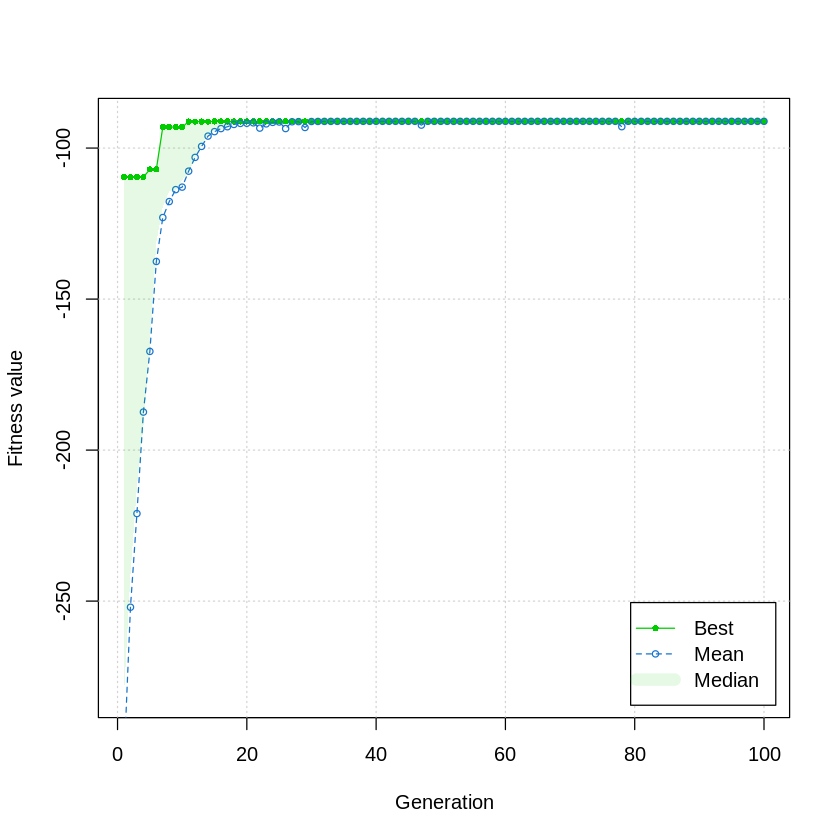

In [7]:
# genetic algorithms
GA = ga(type = 'real-valued',
      fitness = function(x) - f1(x[1], x[2], x[3], x[4]),
      lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5, 5),
      popSize = 50, maxiter = 100, run = 100,
      pcrossover = 0.75,
      pmutation = 0.001
)

summary(GA)
plot(GA)

In this code snippet the cross sectional area is minimized.
We are also plotting the average and best fitness values.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.04574442 
Solution = 
           x1       x2       x3      x4
[1,] 72.70742 39.96413 3.801364 1.45605

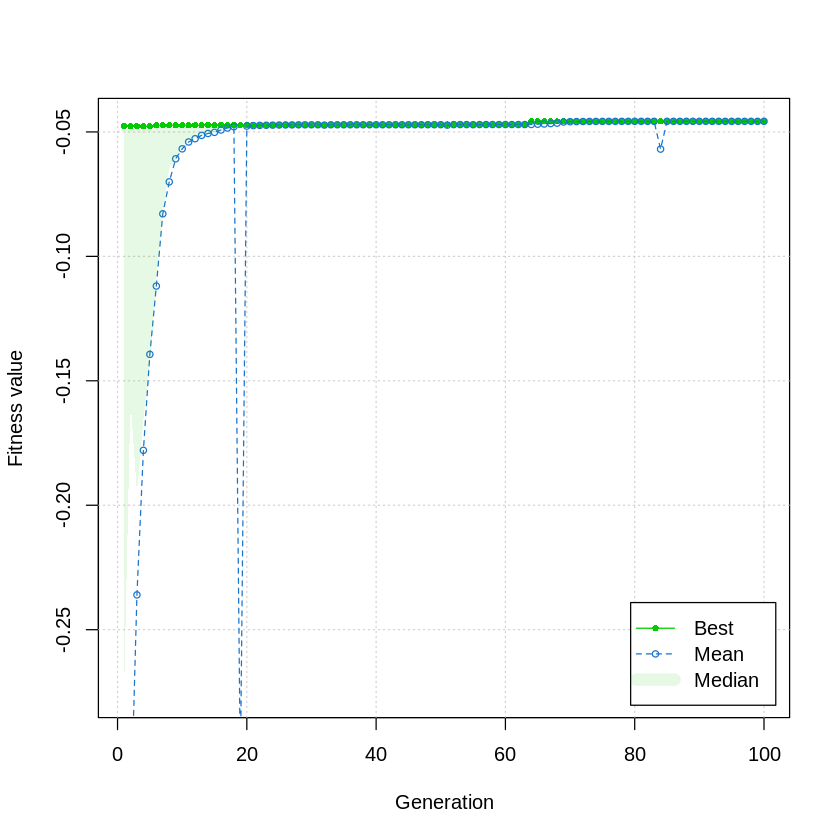

In [10]:
GA = ga(type = 'real-valued',
        fitness = function(x) - f2(x[1], x[2], x[3], x[4]),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50 , 5, 5),
        popSize = 50, maxiter = 100,run = 100,
        pcrossover = 0.75,
        pmutation = 0.001
)

summary(GA)
plot(GA)

In this code snippet we are minimizing the beam definition.
The best and average fitness values are plotted.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.03904137 
Solution = 
           x1       x2       x3       x4
[1,] 74.17481 31.71987 4.072487 1.091799

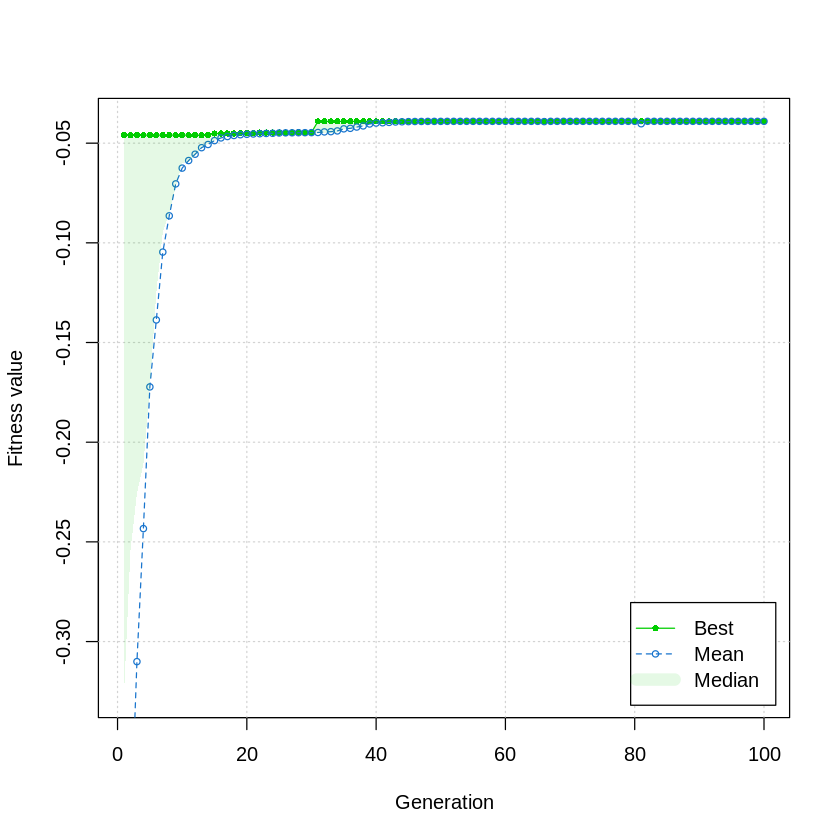

In [12]:
a = 0
f3 <- function(x1, x2, x3, x4, a) {
  (a * f1(x2, x2, x3, x4)) + ((1 - a) * f2(x1, x2, x3, x4))
}
GA = ga(type = 'real-valued',
        fitness = function(x) - f3(x[1], x[2], x[3], x[4], a),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50 , 5, 5),
        popSize = 50, maxiter = 100,run = 100,
        pcrossover = 0.75,
        pmutation = 0.001
)

summary(GA)
plot(GA)

The full function is now minimized.
We will now get the best and average fitness values.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -19.97804 
Solution = 
           x1       x2       x3       x4
[1,] 59.24519 10.65365 1.358694 1.358101

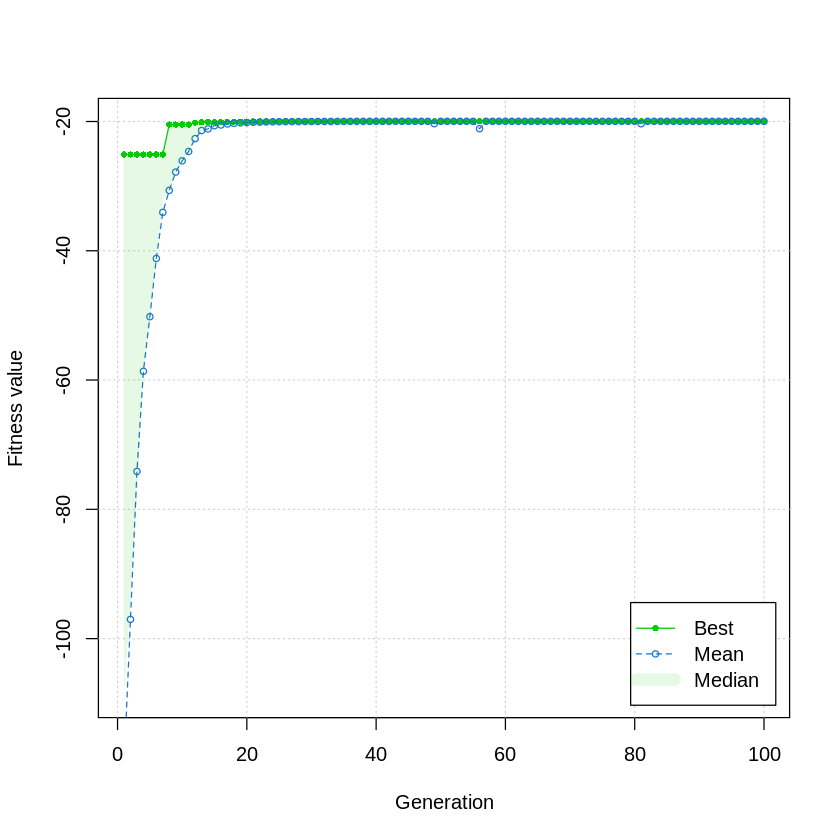

In [13]:
a = 0.5
f3 <- function(x1, x2, x3, x4, a) {
  (a * f1(x2, x2, x3, x4)) + ((1 - a) * f2(x1, x2, x3, x4))
}
GA = ga(type = 'real-valued',
        fitness = function(x) - f3(x[1], x[2], x[3], x[4], a),
        lower = c(10, 10, 0.9, 0.9), upper = c(80, 50 , 5, 5),
        popSize = 50, maxiter = 100,run = 100,
        pcrossover = 0.75,
        pmutation = 0.001
)

summary(GA)
plot(GA)

Now the a and b values are different to see the difference in the graphs.